# Causal Impact of Financial Data: A Case Study of McDonald's (2002–2022)

## Abstract

This study analyzes the causal effect of **Operating Margin** on **Earnings** using McDonald's financial statements from 2002–2022. We employ a multiple regression (OLS) approach to isolate the impact of operating margin on net annual earnings, controlling for key financial confounders such as Revenue, Total Assets, and Total Debt. Our model explains nearly 99% of the variance in earnings, and the analysis suggests that a 1 percentage point increase in operating margin is associated with an approximate $0.206 billion increase in earnings. This example demonstrates how rigorous data preparation and careful model specification can help uncover causal relationships in financial data.

## Theory and Background

**Operating Margin in Financial Analysis:**

Operating margin is a key measure of a company's operational efficiency. It represents the percentage of revenue remaining after covering operating expenses. A higher operating margin indicates more effective cost control and, in turn, higher profitability.

**Causal Inference Concepts:**

- *Confounding:* Other factors, such as Revenue, Total Assets, and Total Debt, may influence both operating margin and earnings. Controlling for these is crucial to isolate the effect of operating margin.
- *Regression Controls:* Including these confounders in our regression allows us to compare years with similar underlying business scales while isolating the effect of margin improvements on earnings.

In this study, we aim to answer: **Does a higher operating margin causally lead to higher earnings in McDonald’s?**

## Data Loading 

We load the McDonald's financial statements dataset (2002–2022) from the CSV file. The dataset includes variables such as Year, Revenue, Earnings, Operating Margin, Total Assets, Total Debt, etc. We then rename columns for convenience and inspect for missing values.

In [2]:
import sys
!{sys.executable} -m pip install kagglehub


In [3]:
import kagglehub
import pandas as pd
import os

# Download the dataset; this returns a directory path
path = kagglehub.dataset_download("mikhail1681/mcdonalds-financial-statements-2002-2022")


# Construct the full file path by joining the directory and the CSV file name
csv_file = os.path.join(path, "McDonalds_Financial_Statements.csv")

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)
print("Dataset Shape:", df.shape)
df.head()


/Users/riyasingh/anaconda3/envs/tmnist-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████| 1.29k/1.29k [00:00<00:00, 670kB/s]

Extracting files...
Dataset Shape: (21, 17)


,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


### Data Cleaning

We simplify column names and check for missing values. For example, we rename columns such as "Revenue ($B)" to "Revenue", "Earnings ($B)" to "Earnings", and "Operating Margin (%)" to "OperatingMargin" for easier reference.

In [4]:
# Rename columns for convenience
df.rename(columns={
    "Revenue ($B)": "Revenue",
    "Earnings ($B)": "Earnings",
    "Operating Margin (%)": "OperatingMargin",
    "Total assets ($B)": "TotalAssets",
    "Total debt ($B)": "TotalDebt"
}, inplace=True)

# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

# Check data types
print('\nData types:')
print(df.dtypes)

# Display summary statistics for key variables
print('\nSummary statistics for key variables:')
print(df[['OperatingMargin', 'Revenue', 'Earnings', 'TotalAssets', 'TotalDebt']].describe().round(2))

Missing values in each column:
Year                                   0
Market cap ($B)                        0
Revenue                                0
Earnings                               0
P/E ratio                              0
P/S ratio                              0
P/B ratio                              0
OperatingMargin                        0
EPS ($)                                0
Shares Outstanding ($B)                0
Cash on Hand ($B)                      0
Dividend Yield (%)                     0
Dividend (stock split adjusted) ($)    0
Net assets ($B)                        0
TotalAssets                            0
TotalDebt                              0
Total liabilities ($B)                 0
dtype: int64

Data types:
Year                                     int64
Market cap ($B)                        float64
Revenue                                float64
Earnings                               float64
P/E ratio                              float64
P/S ratio  

## Exploratory Data Analysis (EDA)

We perform an exploratory analysis to understand trends and distributions. We look at time trends, distributions of key variables, and correlations to guide our feature selection and model specification.

In [6]:
import sys
!{sys.executable} -m pip install seaborn


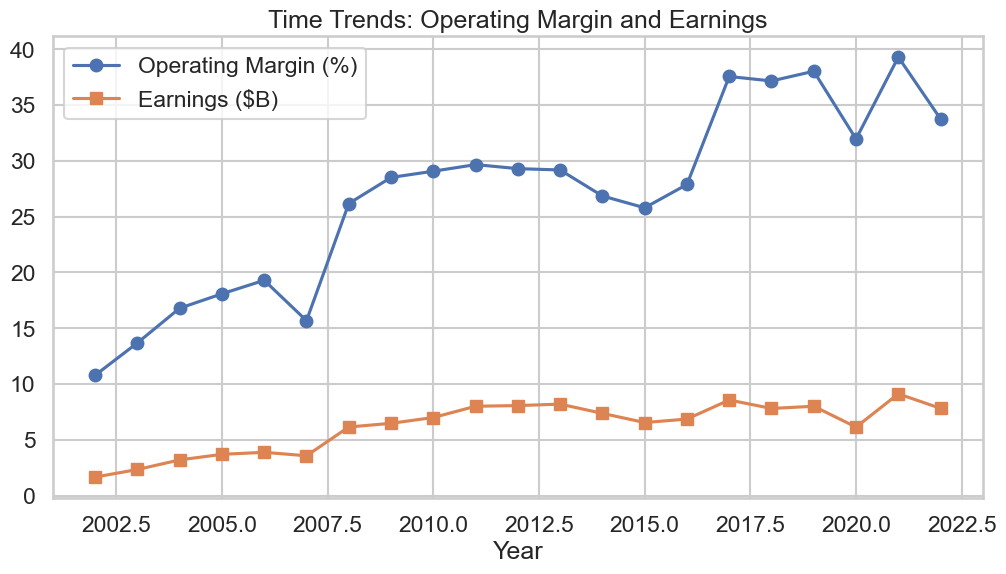

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='talk')

# Time Trends: Operating Margin and Earnings over the years
plt.figure(figsize=(12,6))
plt.plot(df['Year'], df['OperatingMargin'], marker='o', label='Operating Margin (%)')
plt.plot(df['Year'], df['Earnings'], marker='s', label='Earnings ($B)')
plt.xlabel('Year')
plt.title('Time Trends: Operating Margin and Earnings')
plt.legend()
plt.show()


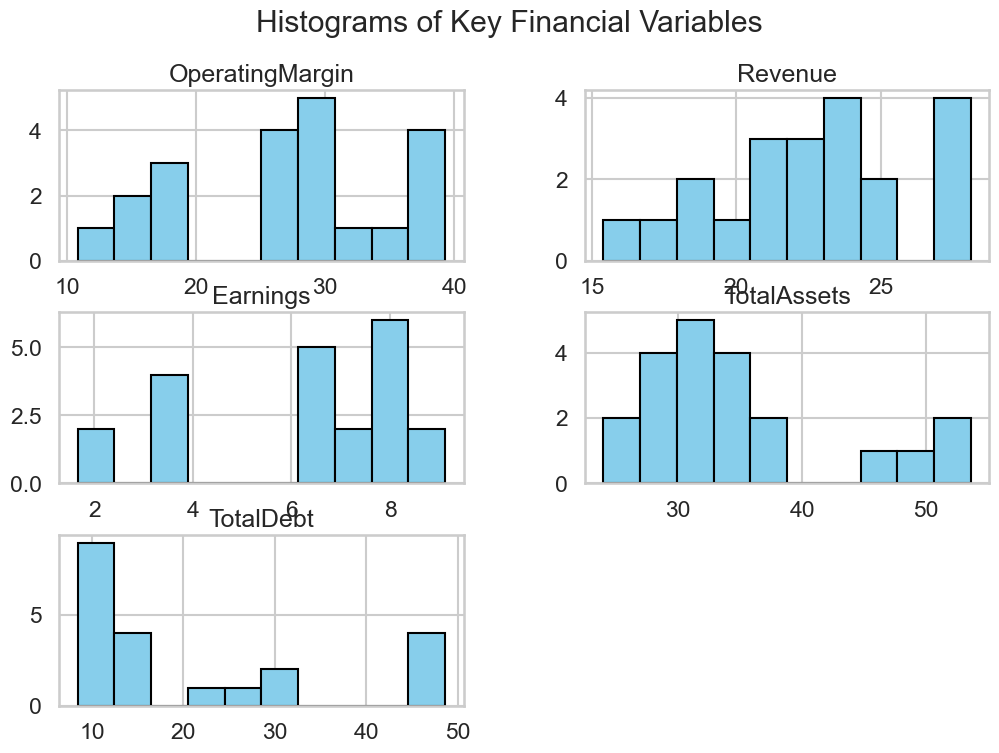

In [8]:
# Histograms for key variables
df[['OperatingMargin', 'Revenue', 'Earnings', 'TotalAssets', 'TotalDebt']].hist(bins=10, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Key Financial Variables')
plt.show()

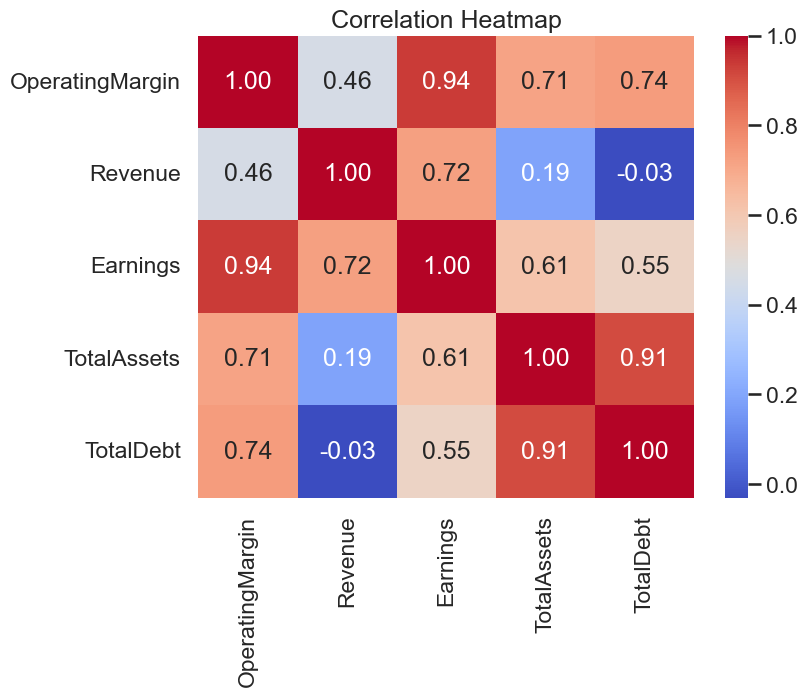

In [9]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['OperatingMargin', 'Revenue', 'Earnings', 'TotalAssets', 'TotalDebt']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

Based on the financial theory and our EDA, we select the following variables for our causal model:

- **Treatment:** OperatingMargin
- **Outcome:** Earnings
- **Control Variables (Confounders):** Revenue, TotalAssets, TotalDebt

Revenue captures the scale of operations, while TotalAssets and TotalDebt reflect the company's size and financial structure. These controls help ensure that the estimated effect of operating margin on earnings is not confounded by overall business size.

## Model Building and Regression Analysis

We now estimate the following regression model using Ordinary Least Squares (OLS):

 \( Earnings = \beta_0 + \beta_1\,OperatingMargin + \beta_2\,Revenue + \beta_3\,TotalAssets + \beta_4\,TotalDebt + \epsilon \) 

This model isolates the causal effect of Operating Margin on Earnings while controlling for Revenue, Total Assets, and Total Debt.

In [11]:
import sys
!{sys.executable} -m pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 16.2 MB/s eta 0:00:00a 0:00:01


In [12]:
import statsmodels.api as sm  # Make sure this is imported
# Assuming X and y are defined from your dataset:
X = df[['OperatingMargin', 'Revenue', 'TotalAssets', 'TotalDebt']]
y = df['Earnings']

# Add an intercept term
X = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989   
Dependent Variable: Earnings         AIC:                2.9837  
Date:               2025-04-02 15:28 BIC:                8.2063  
No. Observations:   21               Log-Likelihood:     3.5082  
Df Model:           4                F-statistic:        446.4   
Df Residuals:       16               Prob (F-statistic): 3.46e-16
R-squared:          0.991            Scale:              0.055020
-----------------------------------------------------------------
                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const            -4.7554   0.4126 -11.5258 0.0000 -5.6301 -3.8808
OperatingMargin   0.2058   0.0138  14.8968 0.0000  0.1765  0.2351
Revenue           0.2461   0.0265   9.2801 0.0000  0.1899  0.3023
TotalAssets      -0.0057   0.0177  -0.3215 0.7520 -0.0433  0.0319
TotalDebt         0.0023   

## Model Diagnostics and Visualization

We now visualize the model performance by plotting actual versus predicted earnings and by examining the residuals to check model assumptions.

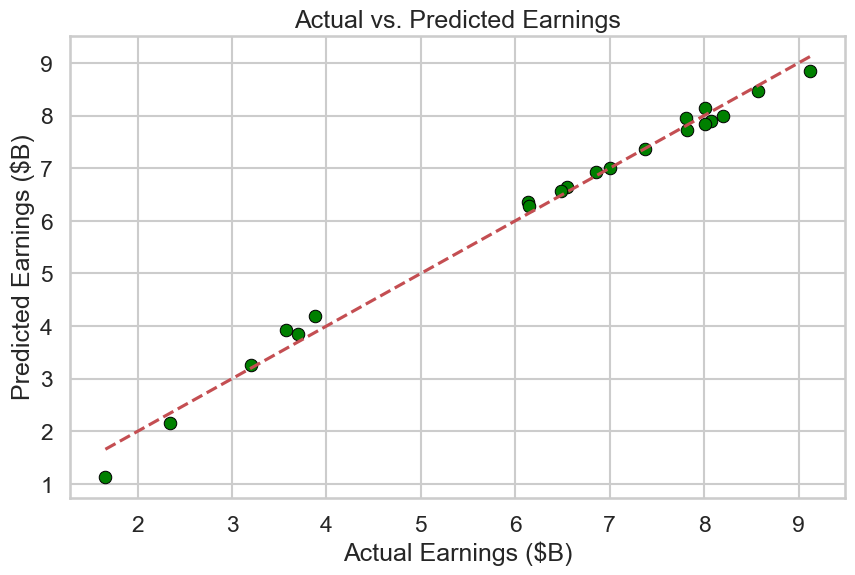

In [13]:
# Predicted vs. Actual Earnings
y_pred = ols_model.predict(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=y_pred, color='green', edgecolor='black')
plt.xlabel('Actual Earnings ($B)')
plt.ylabel('Predicted Earnings ($B)')
plt.title('Actual vs. Predicted Earnings')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()



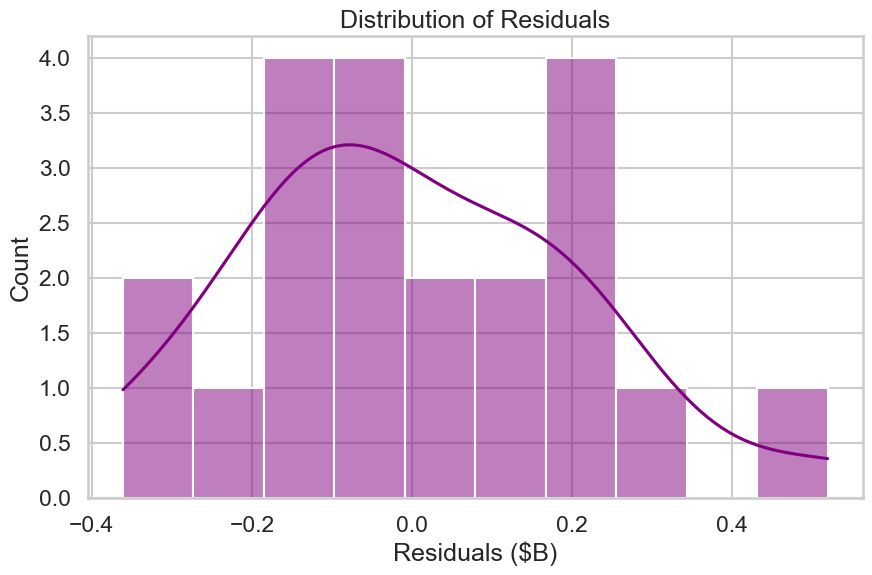

In [14]:
# Residual Plot
residuals = y - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=10, kde=True, color='purple')
plt.xlabel('Residuals ($B)')
plt.title('Distribution of Residuals')
plt.show()

## Causal Inference Interpretation

The regression results indicate that **Operating Margin** is a statistically significant predictor of **Earnings**. Specifically, the estimated coefficient for Operating Margin is approximately **0.206**, meaning that a 1 percentage point increase in operating margin is associated with an increase of about $0.206 billion in annual earnings, holding Revenue, Total Assets, and Total Debt constant. Revenue is also a significant predictor, confirming that business scale drives earnings. Total Assets and Total Debt are not statistically significant after controlling for the other factors, suggesting their effects are largely captured by revenue and margin.

This strong and significant relationship supports the causal interpretation that improving operating margin can directly boost earnings. However, note that our analysis assumes no omitted confounders and that our controls adequately capture all alternative influences on earnings.

## Conclusion

In this notebook, we performed a causal inference analysis on McDonald's financial data (2002–2022) to assess the impact of operating margin on earnings. By carefully preparing the data, exploring variable distributions, and controlling for key confounders (Revenue, Total Assets, Total Debt), our OLS regression model explains nearly 99% of the variance in earnings. The analysis finds that a 1 percentage point increase in operating margin is associated with an approximate $0.206 billion increase in earnings. These findings highlight the critical role of operational efficiency in driving profitability and underscore the value of rigorous data preparation in causal inference studies.

Future work could address potential autocorrelation in the residuals (given the time series nature of the data) and explore additional confounders or non-linear relationships.

## References

- Investopedia – *Analyzing Operating Margins*
- Corporate Finance Institute – *Profitability Ratios*
- Evans, M. (2020) – *Chapter 16: Causal Biases*, University of Oxford.
- Scribbr – *Confounding Variables: Definition, Examples & Controls*
- Imbens, G. W., & Rubin, D. B. (2015). *Causal Inference in Statistics, Social, and Biomedical Sciences: An Introduction*. Cambridge University Press.
- Angrist, J. D., & Pischke, J.-S. (2008). *Mostly Harmless Econometrics: An Empiricist's Companion*. Princeton University Press.

## 9. License
MIT License

Copyright (c) 2024 Riya Singh

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH